In [30]:
#Choosing the working directory
import os
os.chdir(r"C:\Users\joaom\Desktop\CC4064_Estrutura\Trabalho\vipers")

In [31]:
#importing Biopython and 3 important packages
import Bio as Bio

from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo

from Bio.Phylo.TreeConstruction import DistanceCalculator

In [32]:
#Importing all the PopSet fasta file (40 sequences) - https://www.ncbi.nlm.nih.gov/popset/1940952900
#read all of the sequences and make a list with them (more easy to manipulate)
list_fasta = list(SeqIO.parse("PopSet_vipers.fasta", "fasta"))

#Print id of each sequence
for record in SeqIO.parse("PopSet_vipers.fasta", "fasta"):
    print(record.id)

MT762206.1
MT762207.1
MT762208.1
MT762209.1
MT762210.1
MT762211.1
MT762212.1
MT762213.1
MT762214.1
MT762215.1
MT762216.1
MT762217.1
MT762218.1
MT762219.1
MT762220.1
MT762221.1
MT762222.1
MT762223.1
MT762224.1
MT762225.1
MT762226.1
MT762227.1
MT762228.1
MT762229.1
MT762230.1
MT762231.1
MT762232.1
MT762233.1
MT762234.1
MT762235.1
MT762236.1
MT762237.1
MT762238.1
MT762239.1
MT762240.1
MT762241.1
MT762242.1
MT762243.1
MT762244.1
MT762245.1


In [33]:
#Load the fasta file with al pit viper sequences into MUSCLE and do the Multiple Sequence Alignment (MUltiple Sequence Comparison by Log-Expectation)
#https://www.ebi.ac.uk/Tools/msa/muscle/

#Opening the .clw file contaning the aligned sequences 
from Bio.Phylo.Consensus import *
with open("PopSet_vipers_alig.clw","r") as aln: 
    MSA = AlignIO.read(aln,"clustal") #Multi Sequence Alignment
    #MSAs = bootstrap(MSA, 100) #BOOTSTRAP
print(type(MSA))


<class 'Bio.Align.MultipleSeqAlignment'>


In [34]:
#Using the Distance Calculator using the "identity" model
#Create a DistanceCalculator object using the "identity" model, this one is the name of the model (scoring matrix) to calculate the distance. 
#The ‘identity’ model is the default one and can be used both for DNA and protein sequences.

from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')

#Writing the Distance Matrix 
distance_matrix = calculator.get_distance(MSA)
print(distance_matrix)
#distance_matrix

MT762243.1	0
MT762244.1	0.15264187866927592	0
MT762245.1	0.13796477495107629	0.12720156555773	0
MT762236.1	0.16046966731898238	0.17416829745596873	0.16242661448140905	0
MT762239.1	0.17710371819960857	0.1819960861056752	0.16829745596868884	0.0606653620352251	0
MT762218.1	0.16634050880626228	0.17318982387475534	0.15068493150684936	0.15264187866927592	0.1477495107632094	0
MT762227.1	0.16242661448140905	0.1643835616438356	0.15166340508806264	0.14579256360078274	0.14090019569471623	0.03033268101761255	0
MT762206.1	0.17318982387475534	0.17123287671232879	0.15851272015655582	0.15068493150684936	0.1477495107632094	0.04109589041095896	0.021526418786692814	0
MT762231.1	0.16634050880626228	0.16927592954990212	0.15264187866927592	0.14481409001956946	0.14187866927592951	0.0332681017612525	0.013698630136986356	0.009784735812133127	0
MT762242.1	0.16731898238747556	0.16829745596868884	0.15068493150684936	0.14677103718199613	0.14383561643835618	0.0332681017612525	0.013698630136986356	0.0117416829745596

In [35]:
#Creating a phylogenetic tree using the UPGMA algorithm 
#(Unweighted Pair Group Method with Arithmetic Mean)

from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor1 = DistanceTreeConstructor(calculator, 'upgma')
tree1 = constructor1.build_tree(MSA)
tree1.rooted = True
print(tree1)

#Ascii-art rooted phylogram (same topology without Inners)
Phylo.draw_ascii(tree1)

#Code to save the tree to a new file: Phylo.write(tree1, "upgma_tree.xml", "phyloxml")

Tree(rooted=True)
    Clade(branch_length=0, name='Inner39')
        Clade(branch_length=0.029526682515900196, name='Inner38')
            Clade(branch_length=0.021096425513698627, name='Inner35')
                Clade(branch_length=0.007752778712084157, name='Inner33')
                    Clade(branch_length=0.05133928571428571, name='Inner31')
                        Clade(branch_length=0.03455234833659492, name='Inner27')
                            Clade(branch_length=0.007338551859099804, name='Inner19')
                                Clade(branch_length=0.0014677103718199608, name='Inner15')
                                    Clade(branch_length=0.0019569471624265866, name='Inner10')
                                        Clade(branch_length=0.000978473581213335, name='MT762217.1')
                                        Clade(branch_length=0.000978473581213335, name='Inner1')
                                            Clade(branch_length=0.0, name='MT762216.1')
             

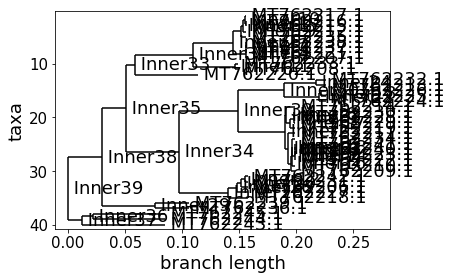

In [36]:
#Visualizing the tree using matplotlib
import matplotlib
import matplotlib.pyplot as plt
fig1 = Phylo.draw(tree1)

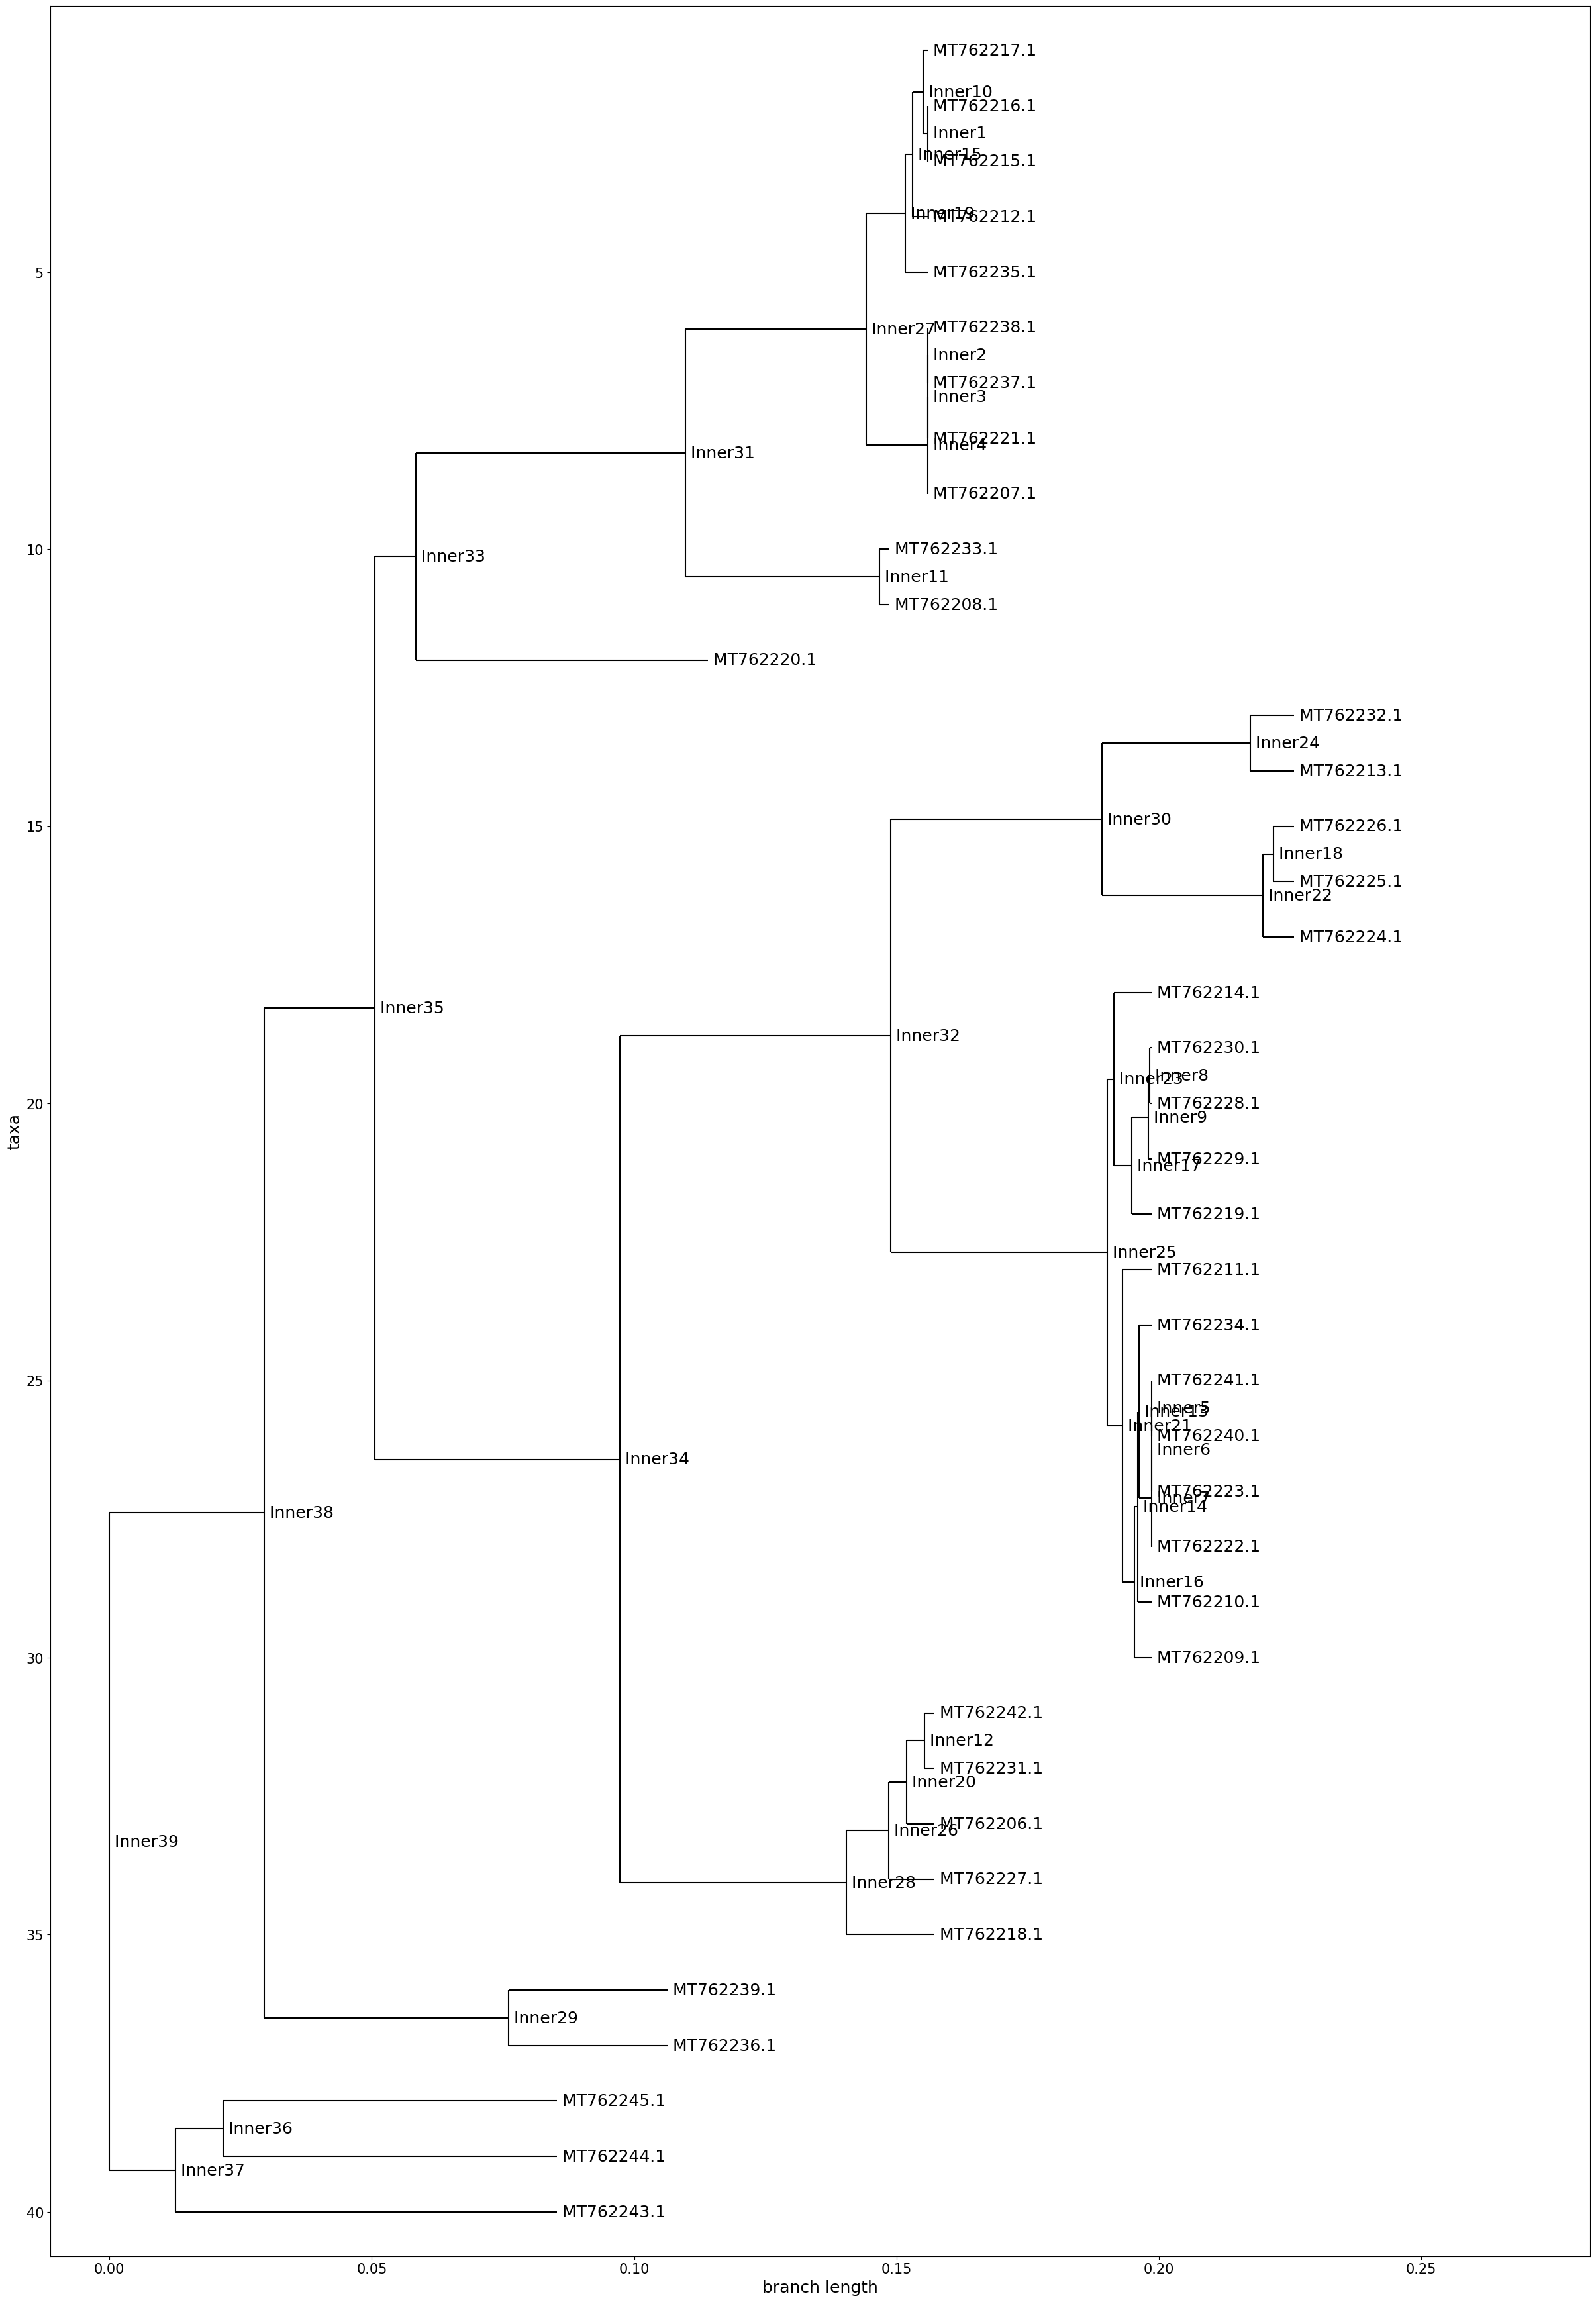

In [37]:
#Making a better looking tree using the features of matplotlib 

fig1 = plt.figure(figsize=(30, 45), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=18)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=15)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=15)       # fontsize of the tick labels
#turtle_tree.ladderize()
axes = fig1.add_subplot(1, 1, 1)
Phylo.draw(tree1, axes=axes)
#Code to save the cladogram to a new figure: fig.savefig("viper_cladogram1")

In [38]:
#Creating a phylogenetic tree using the NJ algorithm
#(Neighbor Joining)

from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor2 = DistanceTreeConstructor(calculator, 'nj')
tree2 = constructor1.build_tree(MSA)
tree2.rooted = True
print(tree2)

#Ascii-art rooted phylogram (same topology without Inners)
Phylo.draw_ascii(tree2)

# Save the tree to a new file 
Phylo.write(tree2, "nj_tree.xml", "phyloxml")

Tree(rooted=True)
    Clade(branch_length=0, name='Inner39')
        Clade(branch_length=0.029526682515900196, name='Inner38')
            Clade(branch_length=0.021096425513698627, name='Inner35')
                Clade(branch_length=0.007752778712084157, name='Inner33')
                    Clade(branch_length=0.05133928571428571, name='Inner31')
                        Clade(branch_length=0.03455234833659492, name='Inner27')
                            Clade(branch_length=0.007338551859099804, name='Inner19')
                                Clade(branch_length=0.0014677103718199608, name='Inner15')
                                    Clade(branch_length=0.0019569471624265866, name='Inner10')
                                        Clade(branch_length=0.000978473581213335, name='MT762217.1')
                                        Clade(branch_length=0.000978473581213335, name='Inner1')
                                            Clade(branch_length=0.0, name='MT762216.1')
             

1

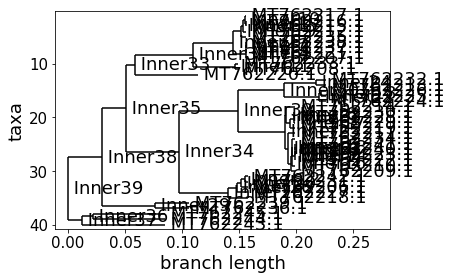

In [39]:
#Visualizing the tree using matplotlib
import matplotlib
import matplotlib.pyplot as plt
fig2 = Phylo.draw(tree2) #, branch_labels=lambda c: c.branch_length
#MSA.ladderize()

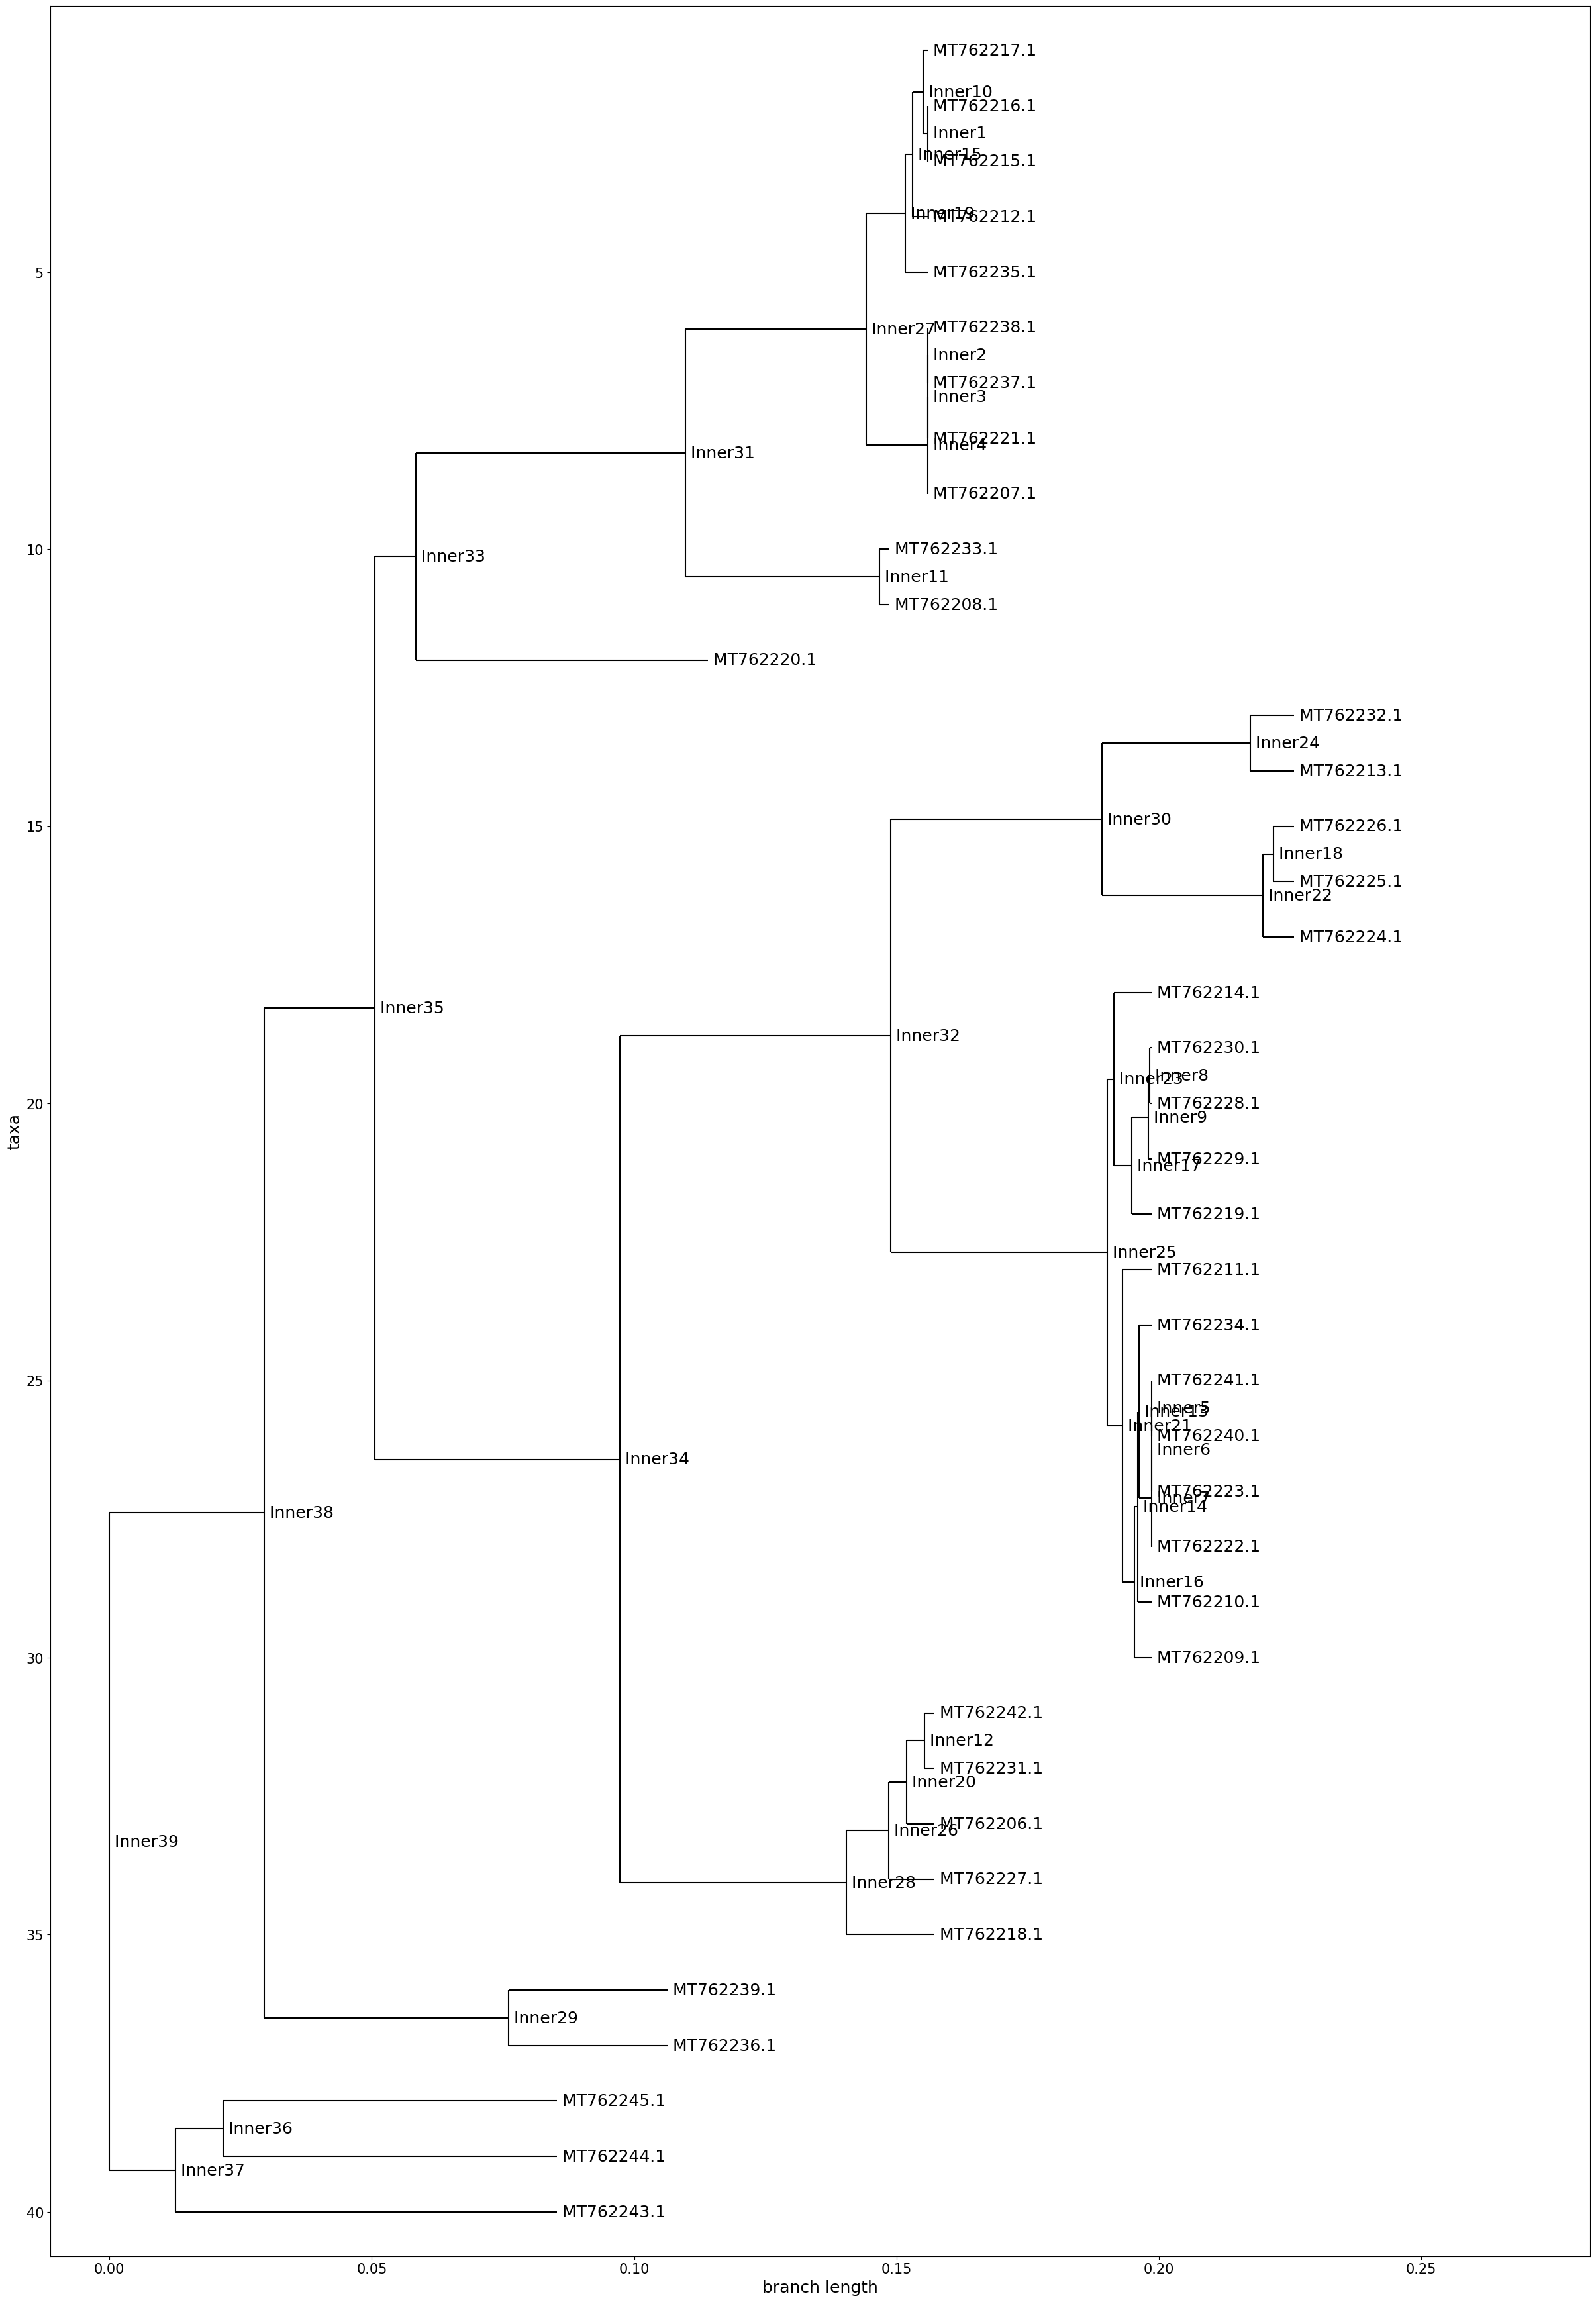

In [40]:
#Making a better looking tree using the features of matplotlib 

fig2 = plt.figure(figsize=(30, 45), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=18)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=15)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=15)       # fontsize of the tick labels
#turtle_tree.ladderize()
axes = fig2.add_subplot(1, 1, 1)
Phylo.draw(tree2, axes=axes)
#Code to save the cladogram to a new figure: fig.savefig("viper_cladogram2")

In [41]:
#Creating a phylogenetic tree using the ParsimonyScorer is a combination of the Fitch algorithm and Sankoff algorithm.
#In this case, it will work as Fitch algorithm by default because no parameter is provided, it can also work as Sankoff algorithm if a parsimony scoring matrix (a Matrix object) is given.

from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import *

#aln = AlignIO.read(open('msa.phy'), 'phylip')
starting_tree = Phylo.read('nj_tree.xml', 'phyloxml')
#starting_tree = Phylo.read('nj.tre', 'newick')
scorer = ParsimonyScorer()
searcher = NNITreeSearcher(scorer)
constructor = ParsimonyTreeConstructor(searcher, starting_tree)
tree3 = constructor.build_tree(MSA)
print(tree3)

#Ascii-art rooted phylogram (same topology without Inners)
Phylo.draw_ascii(tree3)

#Code to save the tree to a new file: Phylo.write(tree3, "fitch_tree.xml", "phyloxml")

Phylogeny(rooted=True)
    Clade(branch_length=0.0, name='Inner39')
        Clade(branch_length=0.029526682515900196, name='Inner38')
            Clade(branch_length=0.021096425513698627, name='Inner35')
                Clade(branch_length=0.007752778712084157, name='Inner33')
                    Clade(branch_length=0.05133928571428571, name='Inner31')
                        Clade(branch_length=0.03455234833659492, name='Inner27')
                            Clade(branch_length=0.007338551859099804, name='Inner19')
                                Clade(branch_length=0.0014677103718199608, name='Inner15')
                                    Clade(branch_length=0.0019569471624265866, name='Inner10')
                                        Clade(branch_length=0.000978473581213335, name='MT762217.1')
                                        Clade(branch_length=0.000978473581213335, name='Inner1')
                                            Clade(branch_length=0.0, name='MT762216.1')
      

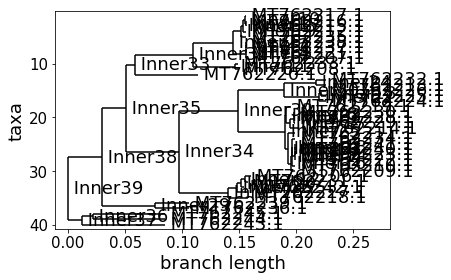

In [42]:
#Visualizing the tree using matplotlib

import matplotlib
import matplotlib.pyplot as plt
fig3 = Phylo.draw(tree3) #, branch_labels=lambda c: c.branch_length
#MSA.ladderize()


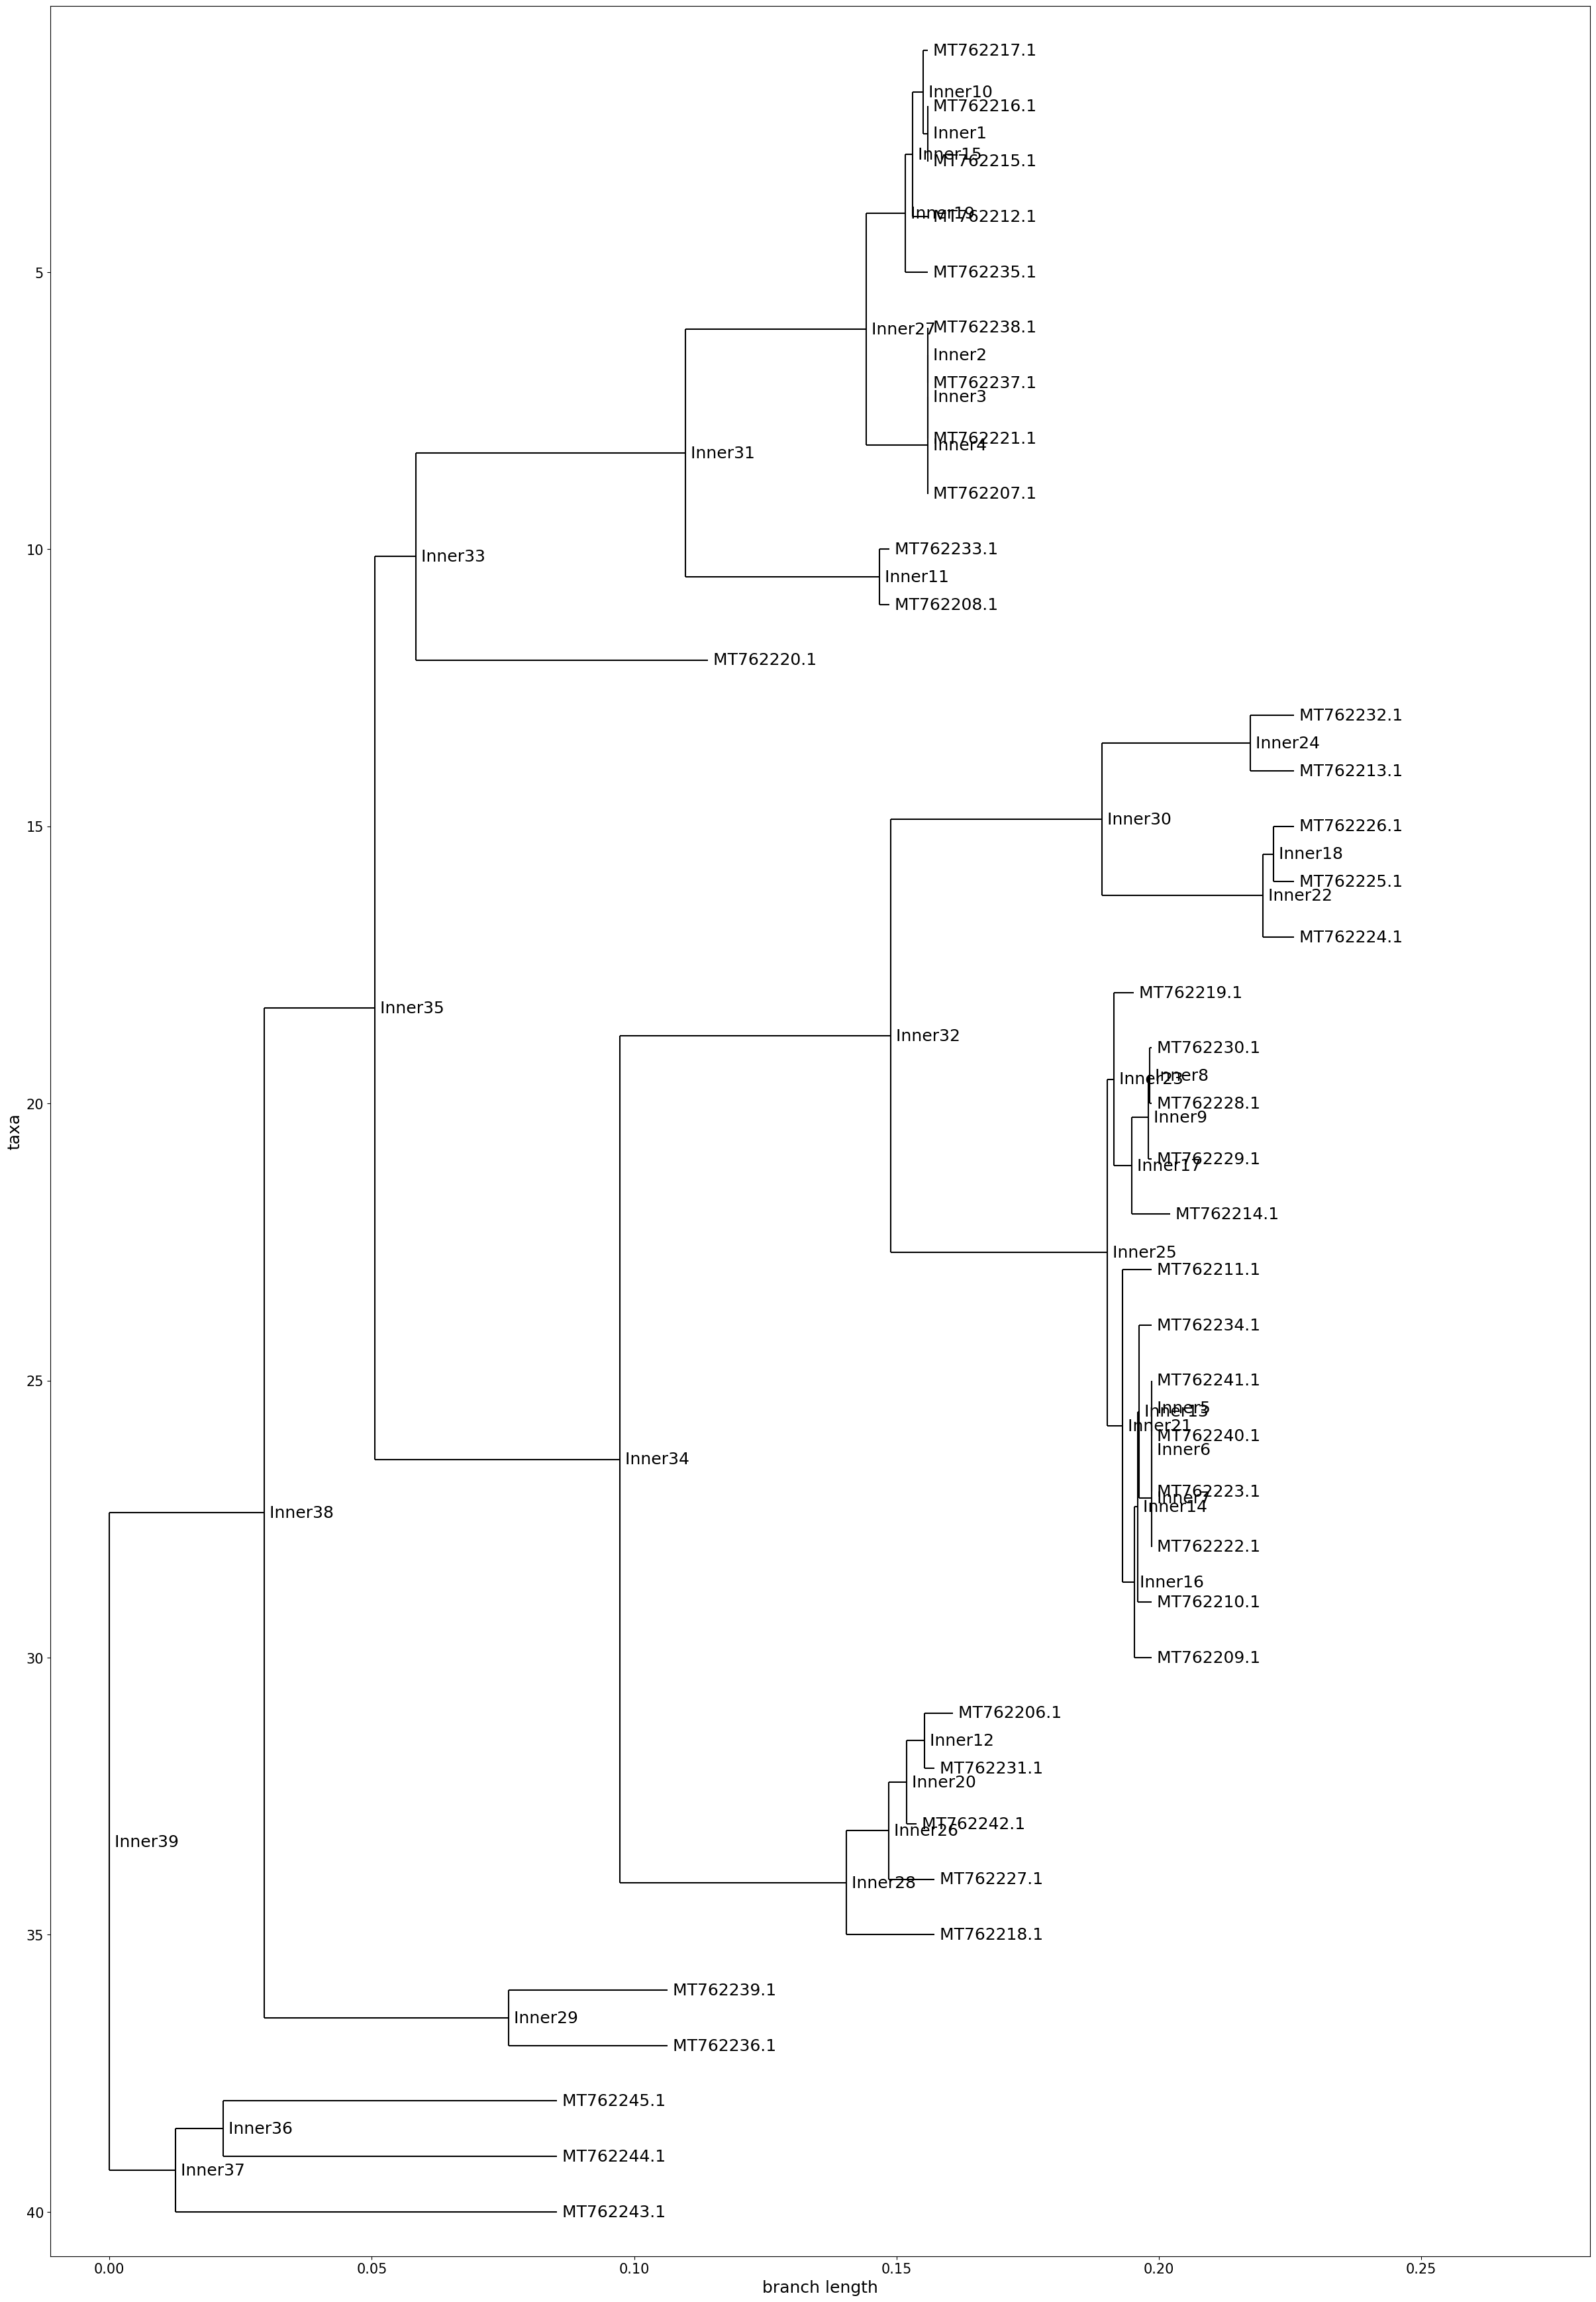

In [43]:
#Making a better looking tree using the features of matplotlib 

fig3 = plt.figure(figsize=(30, 45), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=18)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=15)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=15)       # fontsize of the tick labels
#turtle_tree.ladderize()
axes = fig3.add_subplot(1, 1, 1)
Phylo.draw(tree3, axes=axes)
#Code to save the cladogram to a new figure: fig.savefig("viper_cladogram3")

In [45]:
#Comparating all of the trees by using the Ascii-art rooted phylogram (same topology without Inners)
Phylo.draw_ascii(tree1)

                                            , MT762217.1
                                           ,|
                                           |, MT762216.1
                                           ||
                                           || MT762215.1
                                          _|
                                         | | MT762212.1
                                         | |
                                         | | MT762235.1
                                _________|
                               |         |  , MT762238.1
                               |         |  |
                               |         |  | MT762237.1
                               |         |  |
                  _____________|         |__| MT762221.1
                 |             |            |
                 |             |            | MT762207.1
                 |             |
                _|             |         , MT762233.1
               | |             |_______

In [46]:
Phylo.draw_ascii(tree2)

                                            , MT762217.1
                                           ,|
                                           |, MT762216.1
                                           ||
                                           || MT762215.1
                                          _|
                                         | | MT762212.1
                                         | |
                                         | | MT762235.1
                                _________|
                               |         |  , MT762238.1
                               |         |  |
                               |         |  | MT762237.1
                               |         |  |
                  _____________|         |__| MT762221.1
                 |             |            |
                 |             |            | MT762207.1
                 |             |
                _|             |         , MT762233.1
               | |             |_______

In [47]:
Phylo.draw_ascii(tree3)

                                            , MT762217.1
                                           ,|
                                           |, MT762216.1
                                           ||
                                           || MT762215.1
                                          _|
                                         | | MT762212.1
                                         | |
                                         | | MT762235.1
                                _________|
                               |         |  , MT762238.1
                               |         |  |
                               |         |  | MT762237.1
                               |         |  |
                  _____________|         |__| MT762221.1
                 |             |            |
                 |             |            | MT762207.1
                 |             |
                _|             |         , MT762233.1
               | |             |_______